In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import Word2Vec
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
dataset = pd.read_csv("IMDB_dataset_preprocessed.csv")
reviews = [w for w in dataset["review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]

In [3]:
# CBOW model
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [4]:
# Skip Gram model
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [5]:
# 10 most similar words to "movie" - CBOW
print(CBOW.wv.most_similar('movie'))

[('film', 0.8420815467834473), ('flick', 0.6631013751029968), ('sure', 0.6198208928108215), ('think', 0.6112020015716553), ('really', 0.5947678089141846), ('one', 0.5901696085929871), ('thats', 0.5617489218711853), ('guess', 0.5518807172775269), ('suppose', 0.5514938831329346), ('anyway', 0.5504233241081238)]


In [6]:
# 10 most similar words to "movie" - Skip-Gram
print(Skip_Gram.wv.most_similar('movie'))

[('film', 0.916131854057312), ('sequal', 0.8639937043190002), ('gymkata', 0.8625146150588989), ('suprise', 0.8570491075515747), ('havent', 0.8570256233215332), ('noroi', 0.8543270230293274), ('strangeland', 0.8465142250061035), ('crapfest', 0.8454206585884094), ('atleast', 0.8445835709571838), ('defiantly', 0.8437045216560364)]


In [7]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec CBOW : ",
CBOW.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec CBOW :  0.8420816


In [8]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec Skip Gram :  0.91613185


In [9]:
# word vector for "word" - CBOW
CBOW.wv["word"]

array([-0.3575734 ,  1.0957981 ,  1.8093824 , -0.17741202,  1.0015674 ,
       -0.03470638,  2.4525769 , -2.2924852 ,  0.31450295,  1.0035976 ,
        2.7151117 , -3.397358  , -1.4895698 ,  0.39426216, -0.03375195,
       -0.2454797 ,  0.5518087 , -0.44048327, -0.8679557 ,  0.08262636,
       -1.0253198 , -0.7585673 ,  0.7424069 ,  0.30012867,  0.730587  ,
        0.79761595, -0.24042793, -0.3020539 , -0.58985513, -1.191361  ,
       -0.45918095,  0.14658959, -0.09871648, -1.2293571 ,  1.7942095 ,
       -3.274913  ,  0.5453801 ,  0.18206002, -3.2068138 , -0.7582366 ,
        0.38734928, -2.6200757 ,  1.208168  , -0.32935074,  0.02899793,
       -2.5515409 ,  0.11257767, -1.7346256 , -0.23427738,  0.71345514,
        1.0951442 ,  0.40522128,  1.7363459 ,  0.2615926 ,  0.0714967 ,
        0.1370289 ,  1.2792011 ,  0.46668154,  0.63417333,  0.07859556,
        0.52810925, -0.02239116,  0.68023026,  0.5405308 ,  0.03543418,
        2.393896  , -0.12414989,  1.5296929 , -1.8531007 , -0.12

In [10]:
# word vector for "word" - Skip-Gram
Skip_Gram.wv["word"]

array([-0.29970917,  0.3197282 ,  0.07141426,  0.28376603, -0.23929752,
       -0.30746597, -0.20239645,  0.13852878, -0.06124731, -0.02676005,
       -0.29159987, -0.9217432 , -0.08699337,  0.08013712,  0.16757475,
       -0.10438698,  0.41936767, -0.5013098 , -0.10694083, -0.17883416,
        0.33961463, -0.44027534,  0.31772995,  0.08069483,  0.27045915,
        0.18352826, -0.41775697, -0.4255858 , -0.02273056, -0.07931766,
       -0.26300752, -0.05597492,  0.0973542 , -0.03532557,  0.21577506,
       -0.09317446, -0.00349665, -0.22475056, -0.35628355, -0.49164334,
        0.17416179, -0.45632598, -0.05989774,  0.02755084, -0.03717084,
       -0.6473486 ,  0.24819267, -0.0474414 ,  0.48379543,  0.3253055 ,
        0.2786789 ,  0.03526721,  0.09194187,  0.26001862, -0.51776475,
        0.22738215, -0.1746225 ,  0.31088874, -0.18936688, -0.043935  ,
       -0.13155381,  0.08524454, -0.44833717,  0.4141042 , -0.50784063,
        0.0786405 , -0.29364485,  0.03813345, -0.09046958,  0.17

In [11]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'movie' - Word2vec " + modelName, pad = 20)
    plt.show()

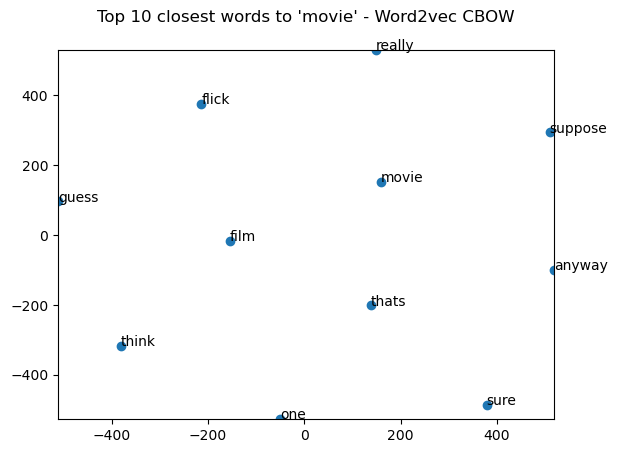

In [12]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'movie', 100)

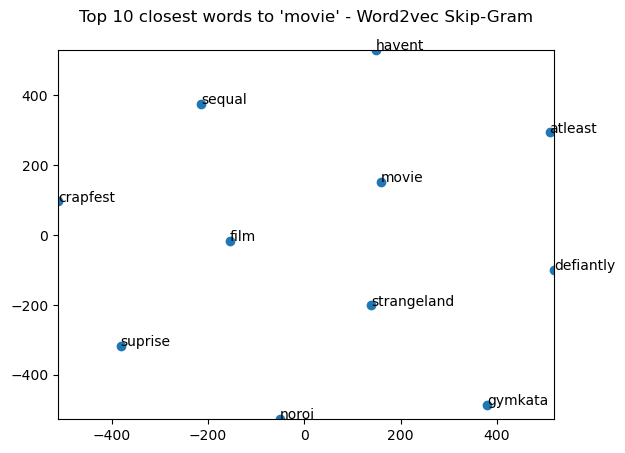

In [13]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'movie', 100)

In [14]:
def getWordVectorCBOW(doc):
    return [CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key]

In [15]:
word_vectors_CBOW = []
for i in range(len(tokenized_words)):
    word_vectors_CBOW.append(getWordVectorCBOW(tokenized_words[i]))

In [16]:
def getWordVectorSkipGram(doc):
    return [Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key]

In [17]:
word_vectors_Skip_Gram = []
for i in range(len(tokenized_words)):
    word_vectors_Skip_Gram.append(getWordVectorSkipGram(tokenized_words[i]))

In [18]:
# saving the vectors to disk
pickle_out = open("word2vec_cbow_vectors_preprocessed.pickle", "wb")
pickle.dump(word_vectors_CBOW, pickle_out)
pickle_out.close()

In [19]:
# saving the vectors to disk
pickle_out = open("word2vec_skip-gram_vectors_preprocessed.pickle", "wb")
pickle.dump(word_vectors_Skip_Gram, pickle_out)
pickle_out.close()